# STAT 345: Nonparametric Statistics

## Lesson 01.1: Basics of Probability and Random Variables

**Reading: Conover Chapter 1**

*Prof. John T. Whelan*

Thursday 16 January 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## Review of Probability

- Look over your notes from MATH-251 or equivalent on the details of probability theory

- There is a brief review in Chapter 1 of Conover.

- I've added [my notebooks from MATH 251](MATH251_timetable.html) to MyCourses

- Analogous conventional notes at [<http://ccrg.rit.edu/~whelan/1016-345/>](http://ccrg.rit.edu/~whelan/1016-345/)

Very briefly, a probability $P(A)$, where $0\le P(A)\le 1$,
can be assigned to an event $A$. An event is, in general, a statement
which can be either true or false.

In the classical or **frequentist**
formulation of probability, it must be the random outcome of a
repeatable experiment. If we repeat the experiment $N$ times, and $N_A$
is the number of times that $A$ turns out to be true, then $N_A/N$
should approach $P(A)$ as $N$ becomes large, i.e.,
$\lim_{N\rightarrow\infty}\frac{N_A}{N}=P(A)$.

In the more general
**Bayesian** formulation of probability, $A$ can refer to any true-false
proposition, and then $P(A|I)$ represents a degree of certainty, given
the available information $I$, that $A$ is true.

Events can be combined in various ways, but for our purposes we’ll be
interested in $AB$ (also referred to as $A\cap B$, $A\hbox{ and }B$,
$A\wedge B$, or $A,B$), which is true if *both* $A$ and $B$ are true,
and false otherwise, and define $P(AB)$ as the probability of this.

Can also define the conditional probability that $A$ is true given the
assumption that $B$ is true, $$P(A|B) = \frac{P(AB)}{P(B)}$$

 We say that
the events $A$ and $B$ are **independent** if $P(AB)=P(A)P(B)$, which
implies that $P(A|B)=P(A)$ and $P(B|A)=P(B)$.

## Probability Distributions

**Random variable**: a quantity ${\color{royalblue}{X}}$ whose value is
not known, but is described using probabilities.

The most general way to
talk about a random variable is via its cumulative distribution function
(cdf) (Conover calls this the “distribution function”)
$$F(x) = P({\color{royalblue}{X}}{\mathbin{\le}}x)$$

For example, the CDF for a Binom(3,0.5) distribution, which describes a random variable equal to the number of heads in three tosses of a fair coin, looks like this:

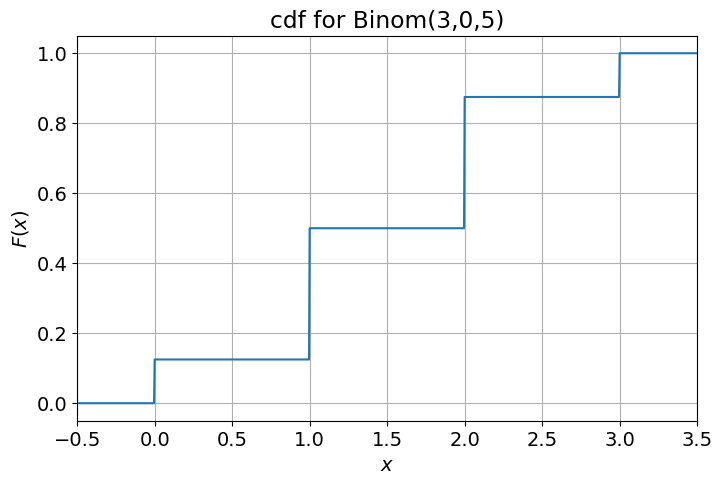

In [3]:
x_x = np.linspace(-0.5,3.5,1001); Fx_x = stats.binom(3,0.5).cdf(x_x); plt.plot(x_x,Fx_x);
plt.xlim(-0.5,3.5); plt.xlabel(r'$x$'); plt.ylabel(r'$F(x)$'); plt.title('cdf for Binom(3,0,5)'); plt.grid();

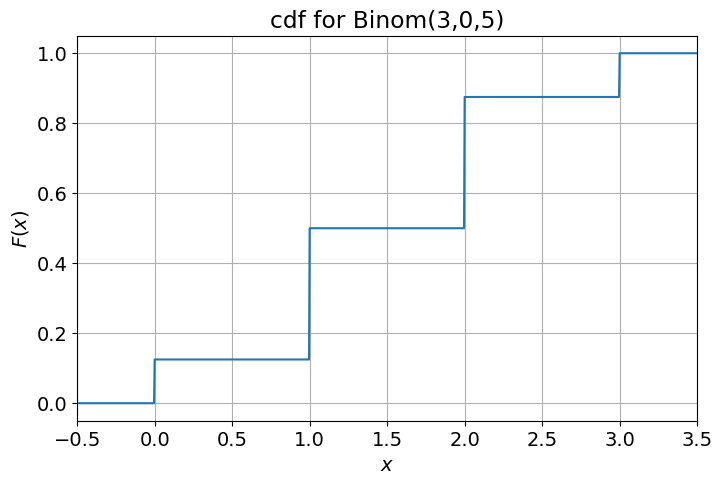

In [4]:
plt.plot(x_x,Fx_x);
plt.xlim(-0.5,3.5); plt.xlabel(r'$x$'); plt.ylabel(r'$F(x)$'); plt.title('cdf for Binom(3,0,5)'); plt.grid();

The CDF is a non-decreasing function with values between 0 and 1; must be, since it's a probability.

In this case, it changes value only in discontinuous jumps, and is constant in between those.  This is because the binomial is a discrete random variable, which can only take on certain specific values.

We can describe a discrete random variable using a probability mass function (pmf)
$$p(x) = P({\color{royalblue}{X}}{\mathbin{=}}x)$$
Conover calls this a “probability function” and, confusingly, uses the notation $f(x)$.

For this Binom(3,0.5) random variable, it looks like this:

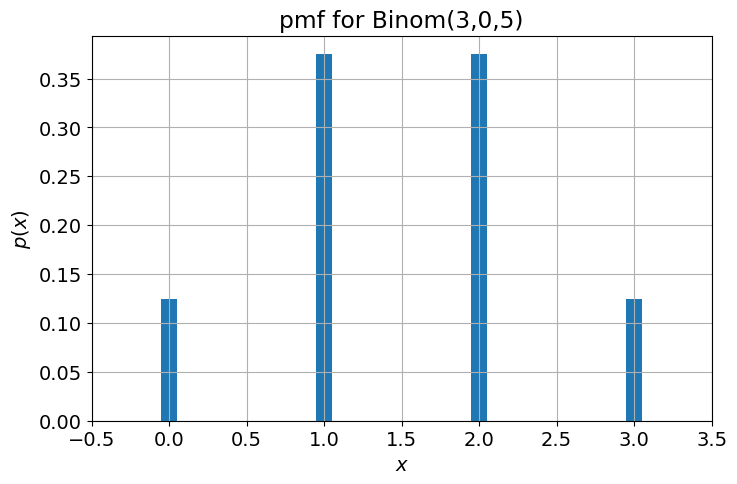

In [5]:
x_x = np.arange(3+1); px_x = stats.binom(3,0.5).pmf(x_x); plt.bar(x_x,px_x,0.1);
plt.xlim(-0.5,3.5); plt.xlabel(r'$x$'); plt.ylabel(r'$p(x)$'); plt.title('pmf for Binom(3,0,5)'); plt.grid();

In the case of the binomial distribution $\operatorname{Binom}(n,\theta)$, we can write the pdf explicitly as
$$
p(x;\theta) = \binom{n}{x} \theta^x (1-\theta)^{n-x} = \frac{n!}{(n-x)!x!} \theta^x (1-\theta)^{n-x} \qquad x=0,1,\ldots,n
$$

At each of the possible values of the random variable, the cdf $F(x)$
jumps by an amount equal to the pmf $p(x)$. If we want the probability
for a discrete random variable to lie between two values $a$ and $b$, we
can add up all of the probabilities for values in between the two
$$P(a{\mathbin{\le}}{\color{royalblue}{X}}{\mathbin{\le}}b) =
  \sum_{x=a}^b p(x) = F(b)-\lim_{\epsilon\rightarrow 0}F(a-\epsilon)$$

On the other hand, the cdf of a standard normal random variable looks like this:

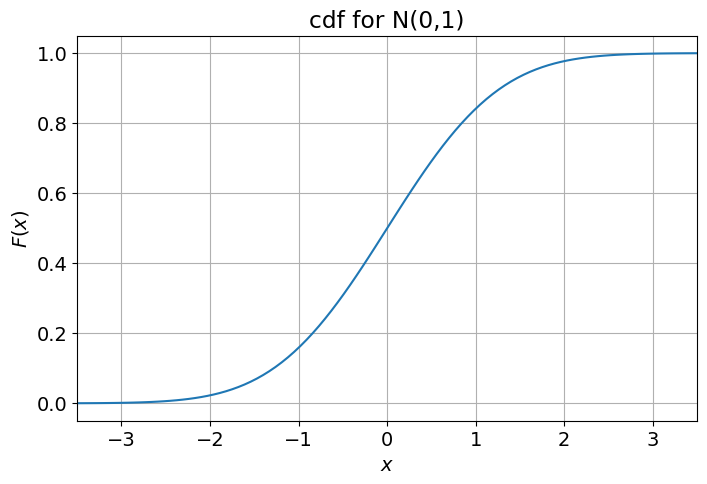

In [6]:
x_x = np.linspace(-3.5,3.5,101)
Fx_x = stats.norm().cdf(x_x)
plt.plot(x_x,Fx_x);
plt.xlim(-3.5,3.5); plt.xlabel(r'$x$'); plt.ylabel(r'$F(x)$'); plt.title('cdf for N(0,1)'); plt.grid(True);

We see that it is a continous function.

Its derivative $f(x)=F'(x)$ is called the probability density function
(pdf), like this

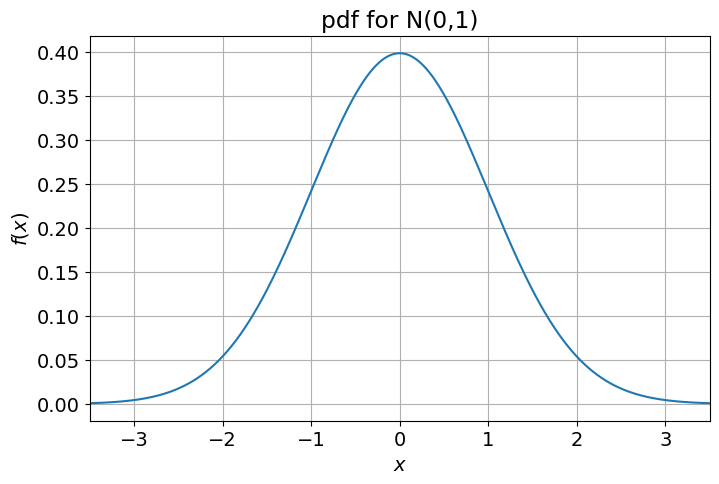

In [7]:
x_x = np.linspace(-3.5,3.5,1001)
fx_x = stats.norm().pdf(x_x)
plt.plot(x_x,fx_x);
plt.xlim(-3.5,3.5); plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$'); plt.title('pdf for N(0,1)'); plt.grid(True);

The pdf can be used to define the probability that ${\color{royalblue}{X}}$
lies in a certain interval:
$$P(a{\mathbin{<}}{\color{royalblue}{X}}{\mathbin{<}}b) =
  P(a {\mathbin{<}}{\color{royalblue}{X}} {\mathbin{\le}}b) = F(b) - F(a) = \int_a^b f(x)\,dx$$

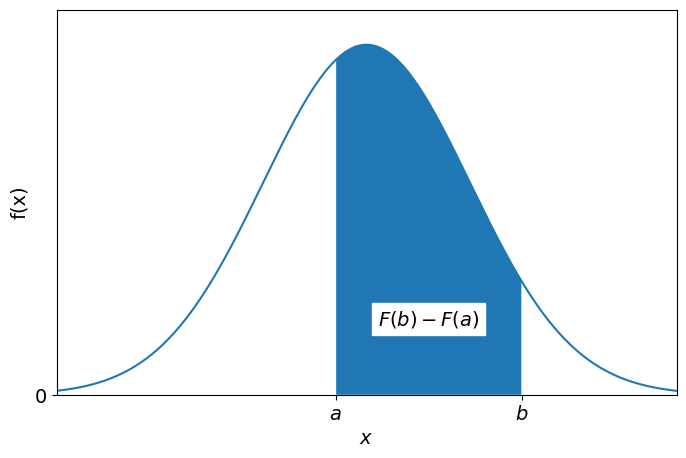

In [8]:
a = -0.3; b = 1.5; x_x = np.linspace(-3.5,3.5,1001); fx_x = stats.norm().pdf(x_x); mymask_x = (x_x>a) & (x_x<b)
plt.plot(x_x,fx_x); plt.fill_between(x_x[mymask_x],0,fx_x[mymask_x]);  plt.xticks([a,b],[r'$a$',r'$b$']);
plt.xlabel(r'$x$'); plt.ylabel(r'f(x)'); plt.xlim(-3,3); plt.ylim(0,1.1*max(fx_x)); plt.yticks([0]);
plt.text(0.5*(a+b),0.2*max(fx_x),r'$F(b)-F(a)$',ha='center',bbox=dict(facecolor='white',edgecolor='white'));

In this normal, aka Gaussian, distribution
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
This distribution has parameters $\mu$ and $\sigma$. It’s an example of
a distribution family with a location parameter $a=\mu$ and a scale
parameter $b=\sigma$. In general, we can write such pdf as
$$f(x) = \frac{1}{b}\, h\left(\frac{x-a}{b}\right)$$ where $h(y)$ is
some function that doesn’t involve $a$ or $b$. Some examples of these
families are plotted below:

In [9]:
y_x = np.linspace(-4.5,4.5,101)
hnorm_x = stats.norm.pdf(y_x) # np.exp(-0.5*y_x **2)/np.sqrt(2.*np.pi)
hcauchy_x = stats.cauchy.pdf(y_x) # 1./(np.pi*(1.+y_x**2))
hlaplace_x = stats.laplace.pdf(y_x) # 0.5*np.exp(-abs(y_x))

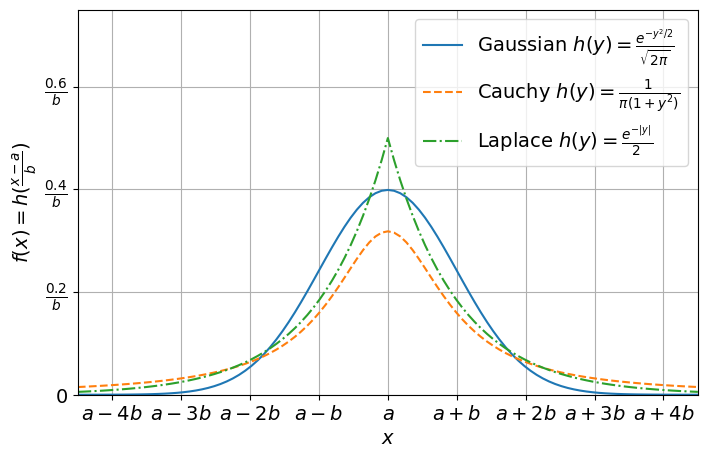

In [10]:
plt.plot(y_x,hnorm_x,label=r'Gaussian $h(y)=\frac{e^{-y^2/2}}{\sqrt{2\pi}}$');
plt.plot(y_x,hcauchy_x,'--',label=r'Cauchy $h(y)=\frac{1}{\pi(1+y^2)}$');
plt.plot(y_x,hlaplace_x,'-.',label=r'Laplace $h(y)=\frac{e^{-|y|}}{2}$');
plt.xlim([-4.5,4.5]); plt.ylim([0.0,0.75]); plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)=h(\frac{x-a}{b})$')
tickvals = [-4,-3,-2,-1,0,1,2,3,4]
ticklabs = [r'$a-4b$',r'$a-3b$',r'$a-2b$',r'$a-b$',r'$a$',r'$a+b$',r'$a+2b$',r'$a+3b$',r'$a+4b$']
plt.xticks(tickvals,ticklabs);
tickvals = [0.0,0.2,0.4,0.6]
ticklabs = [r'$0$',r'$\frac{0.2}{b}$',r'$\frac{0.4}{b}$',r'$\frac{0.6}{b}$']
plt.yticks(tickvals,ticklabs); plt.legend(); plt.grid();

Of course, distributions may have additional parameters which influence
them in more complicated ways, generally known as **shape parameters**,
for example the number of degrees of freedom $\nu$ in a Student-$t$
distribution, which has a pdf of the form
$$h(y) \propto \frac{1}{\left(1+\frac{y^2}{\nu}\right)^{\frac{\nu+1}{2}}}$$
(We’ve omitted the form of the normalization constant, which is not
particularly enlightening.)

When $\nu=1$ this is the Cauchy distribution; as $\nu\rightarrow\infty$, it goes to the normal distribution.

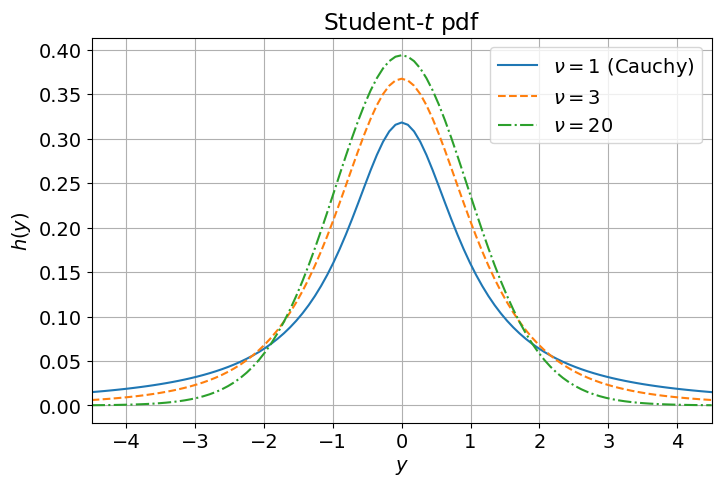

In [11]:
y_x = np.linspace(-4.5,4.5,101); ht1_x = stats.t(df=1).pdf(y_x)
ht3_x = stats.t(df=3).pdf(y_x); ht20_x = stats.t(df=20).pdf(y_x)
plt.plot(y_x,ht1_x,label=r'$\nu=1$ (Cauchy)')
plt.plot(y_x,ht3_x,'--',label=r'$\nu=3$')
plt.plot(y_x,ht20_x,'-.',label=r'$\nu=20$')
plt.xlabel(r'$y$'); plt.ylabel(r'$h(y)$'); plt.title('Student-$t$ pdf');
plt.xlim([-4.5,4.5]); plt.legend(); plt.grid(True);

Note: the pdfs we've plotted so far were symmetric.  One family of non-symmetric distributions, w/shape parameter, $\alpha>0$ & scale parameter $\beta>0$, is the Gamma distribution, with pdf
$$
f(x;\alpha,\beta) \propto x^{\alpha-1} e^{-x/\beta} \qquad x>0
$$

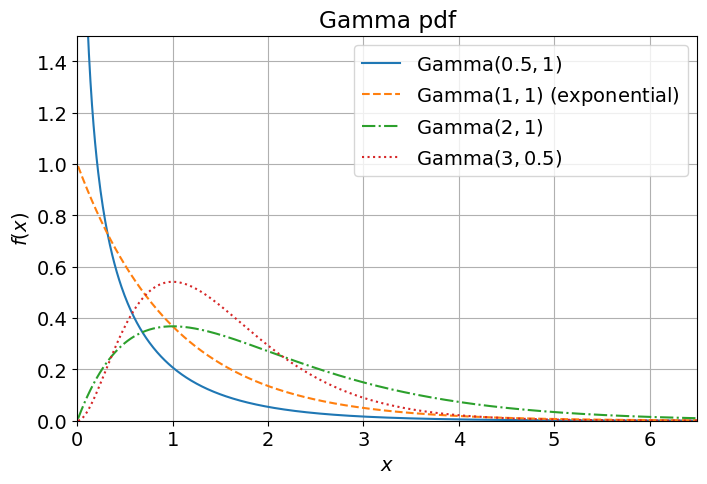

In [12]:
x_x = np.linspace(0,6.5,801)[1:]; f0p5_x = stats.gamma(0.5).pdf(x_x); f1_x = stats.gamma(1).pdf(x_x)
f2_x = stats.gamma(2).pdf(x_x); f3_x = stats.gamma(3,scale=0.5).pdf(x_x)
plt.plot(x_x,f0p5_x,label=r'Gamma$(0.5,1)$'); plt.plot(x_x,f1_x,'--',label=r'Gamma$(1,1)$ (exponential)')
plt.plot(x_x,f2_x,'-.',label=r'Gamma$(2,1)$'); plt.plot(x_x,f3_x,':',label=r'Gamma$(3,0.5)$')
plt.xlim([0,6.5]);plt.ylim([0,1.5]);plt.xlabel(r'$x$');plt.ylabel(r'$f(x)$')
plt.title('Gamma pdf');plt.legend();plt.grid(True);

This form we've used for the pdf implicitly fixes the location parameter, but we could in principle define a location parameter $x_0$ and write
$$
f(x;\alpha,\beta,x_0) \propto (x-x_0)^{\alpha-1} e^{-(x-x_0)/\beta} \qquad x>x_0
$$

The Gamma distribution has a lot of uses, and for different values of its parameters it includes other distributions such as exponential and chi-squared, but for the moment, it just serves as an illustration of a non-symmetric probability distribution. 

## Using `scipy.stats` to “Look Up” Properties of Standard Distributions

- Stats books have tables of percentiles & probabilities for distributions; this is anachronistic in light of statistical software like SciPy, R, etc.  (Like tables of sines & cosines in old trig books.)

- We've already used `cdf()`, `pmf()`, and `pdf()` to make the plots above.  
- Jargon: these are "methods" which operate on an object like `stats.binom` (binomial distribution), `stats.norm` (normal distribution), `stats.t` (Student-$t$ distribution).

- Full documentation, including a full list of available distributions, at [<https://docs.scipy.org/doc/scipy/reference/stats.html>](https://docs.scipy.org/doc/scipy/reference/stats.html)
- Can also get docs within the notebook like this:

In [13]:
?stats

Type:        module
String form: <module 'scipy.stats' from '/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/scipy/stats/__init__.py'>
File:        ~/.local/lib/python3.9/site-packages/scipy/stats/__init__.py
Docstring:  
.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions,
summary and frequency statistics, correlation functions and statistical
tests, masked statistics, kernel density estimation, quasi-Monte Carlo
functionality, and more.

Statistics is a very large area, and there are topics that are out of scope
for SciPy and are covered by other packages. Some of the most important ones
are:

- `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
  regression, linear models, time series analysis, extensions to topics
  also covered by ``scipy.stats``.
- `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
  functionality, interfaces to

The full documentation is a bit technical; sometimes more useful to try something specific like

In [14]:
?stats.norm

Signature:       stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7fc46dd2a3d0>
File:            ~/.local/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
   

In [15]:
?stats.norm.cdf

Signature: stats.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/.local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


To give some examples of use, here is the standard normal cdf $\Phi(1)$:

In [16]:
stats.norm.cdf(1.)

0.8413447460685429

Sometimes it's also useful to access the *survival function* $S(x)=1-F(x)=P({\color{royalblue}{X}}\mathbin{>}x)$:

In [17]:
stats.norm.sf(1.)

0.15865525393145707

The survival function is is particularly useful in cases where the cdf is close to $1$:

In [18]:
stats.norm.sf(9.)

1.1285884059538324e-19

If we tried to evaluate $S(x)=P({\color{royalblue}{X}}\mathbin{>}x)$ as $1-F(x)=1-P({\color{royalblue}{X}}\mathbin{\le}x)$, we'd get "underflow"

In [19]:
stats.norm.cdf(9.)

1.0

In [20]:
1-stats.norm.cdf(9.)

0.0

Floating point can represent numbers very close to zero, but numbers very close to one get rounded off.

You can also specify location and scale parameters for any distribution, as well as shape parameters where appropriate.  For instance if ${\color{royalblue}X}$ is a normal random variable with $\mu=0.3$ and $\sigma=0.5$, the probability that ${\color{royalblue}X}\le 1.3$ is
$$
\Phi\left(\frac{1.3-0.3}{0.5}\right)=\Phi\left(\frac{1.0}{0.5}\right)=\Phi\left(2\right)
$$

In [21]:
stats.norm.cdf(1.3,scale=0.5,loc=0.3)

0.9772498680518208

In [22]:
stats.norm.cdf(1.,scale=0.5)

0.9772498680518208

In [23]:
stats.norm.cdf(2.)

0.9772498680518208

I can either specify the parameters of the distribution when I’m invoking it, or in the argument
of the request for the cdf, so I can also use

In [24]:
stats.norm(scale=0.5,loc=0.3).cdf(1.3)

0.9772498680518208

If I'm going to be using the same distribution repeatedly, it's useful to assign the object representing that distribution to a variable and then access any methods needed:

In [25]:
mydist = stats.norm(scale=0.5,loc=0.3)
mydist.cdf(1.3)

0.9772498680518208

In [26]:
mydist

In [27]:
mydist.cdf(0.8)

0.8413447460685429

## Quantiles

An important quantity associated with a probability distribution is the
**quantile** associated with a value $p$ such that $0\le p\le 1$. The
$p$th quantile of a distribution is the value $x_p$ such that the
corresponding random variable has a probability $p$ of lying below
$x_p$. Stated more precisely (which is important for discrete
distributions),
$$P({\color{royalblue}{X}}{\mathbin{<}}x_p) \le p \qquad\hbox{and}\qquad P({\color{royalblue}{X}}{\mathbin{>}}x_p)\le 1-p$$
The $0.5$ quantile is also known as the median or the 50th percentile.
The $0.05$ quantile is the 5th percentile, the $0.75$ quantile is the
75th percentile or the third quartile, etc.

In [28]:
mydist = stats.norm()
p = 0.9
xp = mydist.ppf(p)
p,xp

(0.9, 1.2815515655446004)

Note that `scipy.stats` defines:
- Percentile `ppf()` which is the inverse function to `cdf()`

In [29]:
mydist.ppf(0.9)

1.2815515655446004

In [30]:
mydist.cdf(mydist.ppf(0.9))

0.8999999999999999

- Inverse survival function `isf()` which is the inverse function to `sf()`

In [31]:
mydist.isf(0.1)

1.2815515655446004

In [32]:
mydist.sf(mydist.isf(0.1))

0.10000000000000009

Note: for a continuous random variable with pdf $f(x)$, the $p$
quantile can be defined indirectly as
$$\int_{-\infty}^{x_p} f(x)\,dx = F(x_p) = p$$

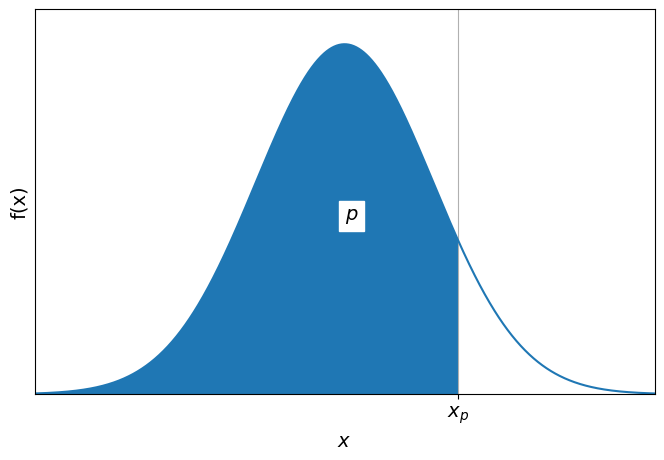

In [33]:
x_x = np.linspace(-3.5,3.5,1001); fx_x = mydist.pdf(x_x); plt.plot(x_x,fx_x);
mymask_x = (x_x<=xp);plt.fill_between(x_x[mymask_x],0,fx_x[mymask_x]);
plt.xticks([xp],[r'$x_p$']);plt.xlabel(r'$x$');plt.ylabel(r'f(x)');plt.ylim(0,1.1*max(fx_x));plt.xlim(-3.5,3.5);
plt.yticks([]);plt.grid(True);plt.text(0,0.5*max(fx_x),r'$p$',bbox=dict(facecolor='white',edgecolor='white'));

### Median vs Mean

The median, or 50th percentile, is a measure of the location of a distribution. Another
measure is the mean, or expectation value, which is the average of the
distribution, whose form depends on whether the distribution is discrete
or continuous:
$$\mu={E\left[{\color{royalblue}{X}}\right]} = \int_{-\infty}^{\infty} x\,f(x)\,dx
  \qquad \hbox{or} \qquad \sum_x x\,p(x)$$

Note that we can, for, convenience, access the mean and median of any distribution we can define in `scipy.stats`:

In [34]:
print(r'N(1.5,2^2) has mean %g and median %g'
      % (stats.norm(loc=1.5,scale=2).mean(),stats.norm(loc=1.5,scale=2).median()))
print(r'Gamma(1.5,2) has mean %g and median %g'
      % (stats.gamma(1.5,scale=2).mean(),stats.gamma(1.5,scale=2).median()))

N(1.5,2^2) has mean 1.5 and median 1.5
Gamma(1.5,2) has mean 3 and median 2.36597


The median is sometimes a more useful & generic than the mean. E.g., for
the Cauchy distribution, the mean is undefined b/c the integral is
the sum of two infinite contributions, one positive and one negative:
$$\begin{split}
    \int_{-\infty}^{\infty} \frac{x\,dx}{\pi(1+x^2)}
    &=
    \int_{-\infty}^{0} \frac{x\,dx}{\pi(1+x^2)}
    +\int_{0}^{\infty} \frac{x\,dx}{\pi(1+x^2)}
    \\
    &= - \lim_{A\rightarrow\infty} \frac{\ln(1+A^2)}{2\pi}
    +\lim_{B\rightarrow\infty} \frac{\ln(1+B^2)}{2\pi}
  \end{split}$$

In [35]:
stats.cauchy.mean()

nan

On the other hand, the median is zero (or more generally
the location parameter $a$), since
$$\int_{-\infty}^{0} \frac{dx}{\pi(1+x^2)}
  =\int_{0}^{\infty} \frac{dx}{\pi(1+x^2)}
  =\frac{1}{2}$$

In [36]:
stats.cauchy.median()

0.0

Likewise, the standard deviation $\sqrt{\operatorname{Var}(\color{royalblue}{X})}=\sqrt{E([\color{royalblue}{X}-\mu]^2)}$ is undefined for a Cauchy random variable; not only is the mean $\mu=E[(\color{royalblue}{X})]$ undefined, but the second moment $E([\color{royalblue}{X}^2)$ diverges because of the integral 
$$\int_{-\infty}^{\infty} \frac{x^2\,dx}{\pi(1+x^2)}
\rightarrow\infty$$

In [37]:
stats.cauchy.std()

nan

On the other hand, the interquartile range is well defined because (using the substitution $x=\tan\theta$)
$$\int_{-1}^{1} \frac{dx}{\pi(1+x^2)} = \int_{-\pi/4}^{\pi/4}\frac{\sec^2\!\theta}{\pi\sec^2\!\theta}d\theta = \frac{1}{2}  $$

In [38]:
stats.cauchy.ppf(0.75)-stats.cauchy.ppf(0.25)

2.0